In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

from svm import SVM

X, y = make_blobs(n_samples=300, centers=2, n_features=2,
                  cluster_std=1.0, random_state=42)

# Convert labels to -1 and 1
y = np.where(y == 0, -1, 1)

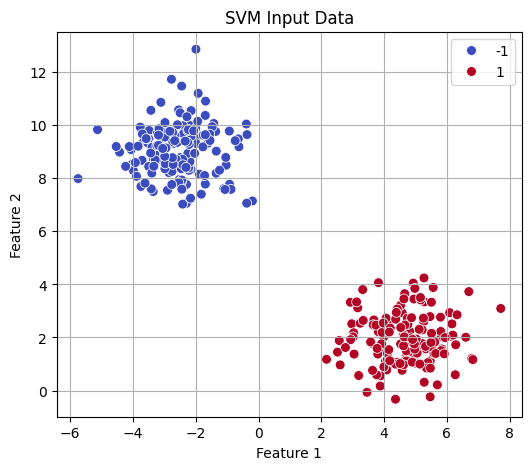

In [63]:
# visualize raw data
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", s=50)
plt.title("SVM Input Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [50]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [67]:
model = SVM(learning_rate=0.01, lambda_param=0.0001, n_iterations=5000)
model.fit(X, y)

y_pred = model.predict(X)
accuracy = model.accuracy(y, y_pred)

print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 100.00%


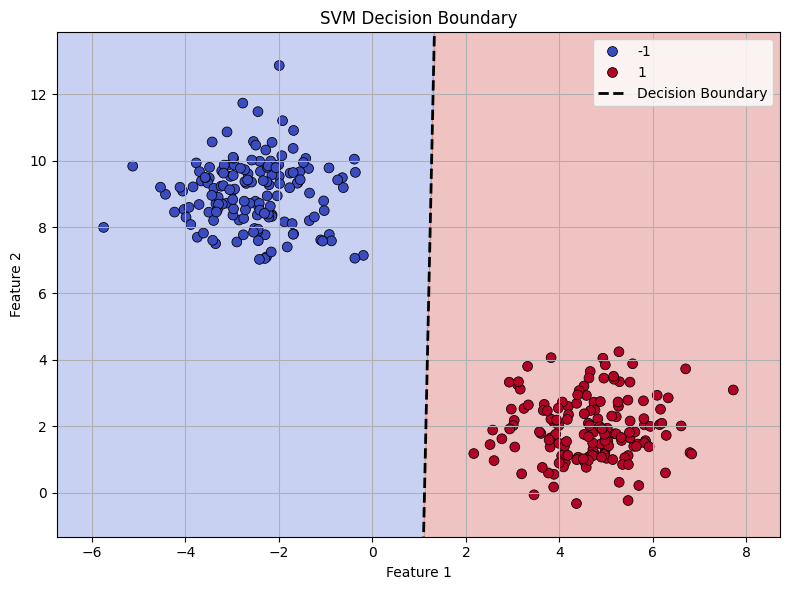

In [70]:
# Meshgrid resolution
h = 0.02  # finer resolution for smoother background

# Define plotting bounds
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)

# plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", s=50, edgecolor='k')

# decision boundary line
w = model.weights
b = model.bias

# avoid divide-by-zero for horizontal boundaries
epsilon = 1e-5 if abs(w[1]) < 1e-5 else 0
x_vals = np.linspace(x_min, x_max, 200)
y_vals = -(w[0] * x_vals + b) / (w[1] + epsilon)

plt.plot(x_vals, y_vals, 'k--', linewidth=2, label="Decision Boundary")

# plot settings
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()